## 📊 Visualizaciones Finales Propuestas

In [1]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/home/tomas/analisisPoblacionPib/data/datos_limpios.csv")

 #### 1. Top 10 países por PIB más reciente disponible

/tmp/ipykernel_83358/599844356.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pib, x="gross_domestic_product_(gdp)", y="country", palette="viridis")


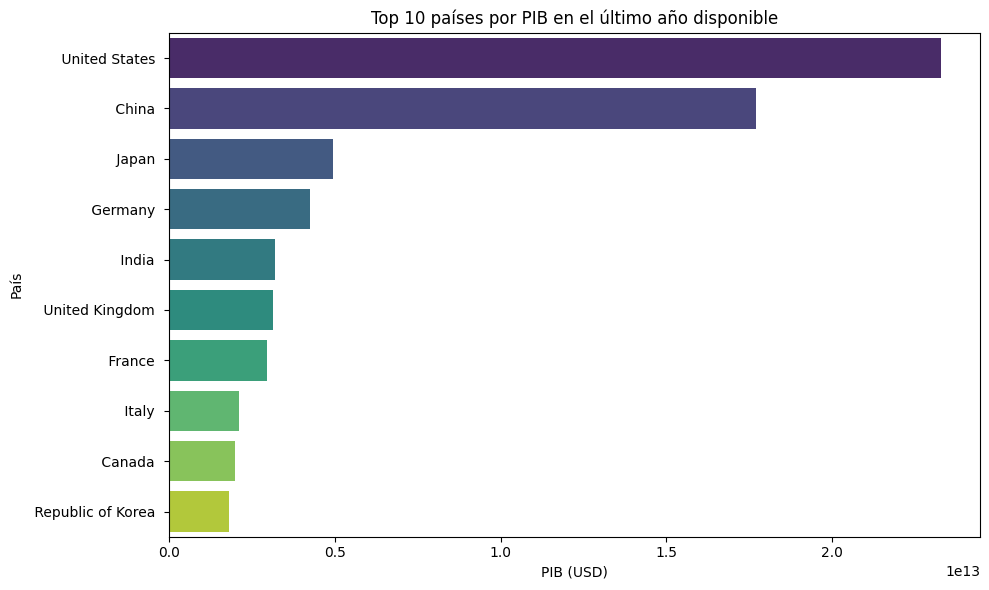

In [4]:
top_pib = df[df["year"] == df["year"].max()].nlargest(10,"gross_domestic_product_(gdp)")
plt.figure(figsize=(10,6))
sns.barplot(data=top_pib, x="gross_domestic_product_(gdp)", y="country", palette="viridis")
plt.title("Top 10 países por PIB en el último año disponible")
plt.xlabel("PIB (USD)")
plt.ylabel("País")
plt.tight_layout()
plt.show()

#### 2. Evolución global de la población


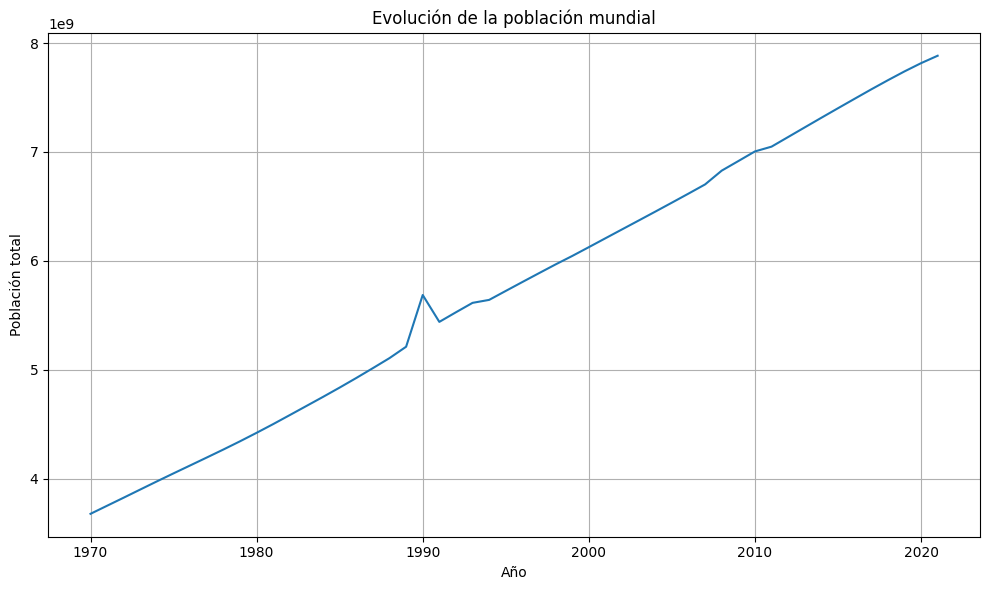

In [5]:
poblacion_global = df.groupby("year")["population"].sum()
plt.figure(figsize=(10,6))
sns.lineplot(x=poblacion_global.index, y=poblacion_global.values)
plt.title("Evolución de la población mundial")
plt.ylabel("Población total")
plt.xlabel("Año")
plt.grid(True)
plt.tight_layout()
plt.show()

MAE: 4321255492.384419
RMSE: 13673182073.713964
R²: 0.9997710577203882


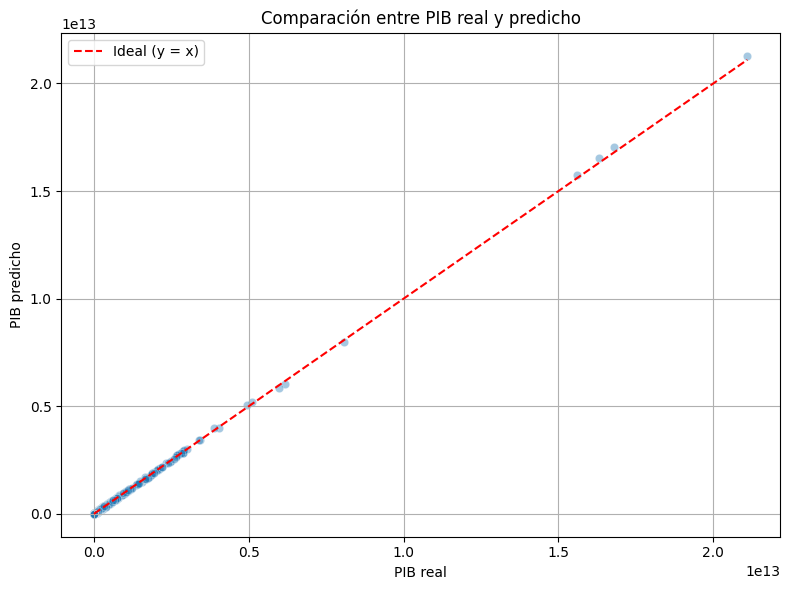

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df[["population", "gross_national_income(gni)_in_usd"]]
y = df["gross_domestic_product_(gdp)"]

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Métricas de evaluación
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Visualización: PIB real vs predicho
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test.values, y=y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal (y = x)')
plt.xlabel("PIB real")
plt.ylabel("PIB predicho")
plt.title("Comparación entre PIB real y predicho")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

